### Chapter 8

# 오버피팅 문제 해결

> ## 학습 목표
-   오버피팅의 정의, 원인, 그리고 모델의 일반화 성능에 미치는 영향을 이해하고, 이를 시각적 예제(예: 학습 곡선)를 통해 확인하고 실무에 적용할 수 있다.
    
-   오버피팅을 방지하기 위해 사용할 수 있는 다양한 기법(예: 조기 종료, 정규화, 기법 선택 등)을 이해하고, 각각의 장단점을 파악하여 실무에 적용할 수 있다.
    
-   드롭아웃(dropout)의 개념과 사용 원리를 이해하고, 이를 통해 오버피팅 문제를 해결하는 방법을 학습하며, 파이토치를 사용하여 드롭아웃을 적용할 수 있다.
    
-   모델의 복잡성을 조절하기 위한 하이퍼파라미터 조정 기법(예: 네트워크 깊이, 유닛 수)을 이해하고, 오버피팅을 방지하기 위해 적절하게 설정할 수 있다.
    
-   오버피팅 해결 방안이 적용된 모델과 그렇지 않은 모델의 성능을 평가하여, 효과적인 방법을 비교 분석하고 실무에 적용할 수 있다.

## 8.1 오버피팅(Overfitting)

### **`개념 (정의)`**
- 오버피팅은 학습 데이터에 지나치게 최적화된 모델 상태를 말합니다.
- 학습 데이터에는 높은 성능을 보이나, 실제 새로운 데이터에 대해서는 성능이 크게 떨어지는 현상

- `오버피팅(Overfitting)`은 머신러닝 모델이 훈련 데이터에 너무 잘 맞춰져서 일반화 성능이 떨어지는 현상을 말합니다. 

   즉, 모델이 훈련 데이터의 `세부적인 노이즈(noise)`나 특이한 패턴에 지나치게 민감하게 반응하여, 새로운 데이터(테스트 데이터나 실제 데이터를 다루는 경우)에 대해서는 성능이 저하되는 현상입니다.

### **`오버피팅의 주요 특징`**

1.  **훈련 데이터에 과도하게 적합**:
    
    -   오버피팅된 모델은 훈련 데이터에서 거의 완벽한 성과를 보입니다. 훈련 데이터에서의 오차가 매우 낮거나 거의 0에 가까울 수 있습니다.
    -   그러나, 이러한 모델은 **새로운 데이터**나 **검증 데이터**에 대해서는 잘 작동하지 않습니다. 모델이 훈련 데이터의 특징을 너무 많이 기억하여 **일반화(generalization)** 능력을 잃게 되기 때문입니다.
2.  **모델 복잡도 증가**:
    
    -   오버피팅은 모델이 너무 복잡하거나, 파라미터 수가 너무 많을 때 자주 발생합니다.
    -   예를 들어, 매우 복잡한 결정 경계를 만드는 모델(과도하게 많은 파라미터나 층을 가진 신경망)은 훈련 데이터에 과도하게 적합하여 새로운 데이터에 대한 예측 성능이 떨어질 수 있습니다.

### **`오버피팅의 원인`**

1.  **모델 복잡도**:
    
    -   모델이 너무 **복잡**하거나 **과도한 수의 파라미터**를 가지고 있으면, 훈련 데이터의 세부사항까지 모두 학습하려고 하게 됩니다. 이로 인해 훈련 데이터에만 지나치게 적합된 모델이 만들어집니다.
2.  **훈련 데이터 부족**:
    
    -   훈련 데이터가 너무 적으면 모델이 훈련 데이터의 특성에 맞춰져 **일반화 능력**이 떨어지게 됩니다.
3.  **잡음(noise) 존재**:
    
    -   훈련 데이터에 노이즈(즉, 불필요한 정보나 오류)가 포함되어 있으면, 모델은 이러한 노이즈까지 학습하려 할 수 있습니다. 이로 인해 **과도한 적합**이 발생할 수 있습니다.
4.  **학습 횟수**:
    
    -   모델을 너무 많이 학습시킬 경우, 훈련 데이터에 맞추는 정도가 지나쳐 오히려 **과적합**이 발생할 수 있습니다. 이는 학습 과정에서 모델이 점점 더 훈련 데이터의 세부 사항을 기억하게 되어, **일반화 성능**이 떨어지는 결과를 초래합니다.

### **`오버피팅 징후`**

-   **훈련 오차는 매우 낮고**, **검증 오차나 테스트 오차가 높은 경우**:
    
    -   훈련 데이터에 대해 오차가 매우 적지만, 검증 데이터나 테스트 데이터에서는 성능이 현저히 떨어질 때, 이는 오버피팅의 징후일 수 있습니다.
-   **훈련 정확도와 테스트 정확도의 차이**:
    
    -   훈련 데이터에서 정확도가 매우 높고 테스트 데이터에서 정확도가 낮으면 오버피팅이 발생했음을 알 수 있습니다.
    -   학습 손실은 계속 감소하지만, 검증 손실은 일정 시점 이후 증가하는 경우에도 오버피팅이 발생했음을 알 수 있습니다.

### **`오버피팅의 예시`**

#### 예시 1: 선형 회귀

-   **훈련 데이터**에 대해서는 매우 좋은 예측 성능을 보이는 모델이지만, **테스트 데이터**에서는 예측이 부정확한 경우가 발생할 수 있습니다. 모델이 훈련 데이터의 잡음을 학습하여 일반화되지 않기 때문입니다.

#### 예시 2: 딥러닝

-   복잡한 신경망 모델에서 훈련 정확도는 매우 높지만, 검증 정확도는 낮아지는 현상이 발생할 수 있습니다. 이는 과도한 네트워크 파라미터나 학습 횟수 증가로 인해 훈련 데이터의 세부 사항에 과적합된 결과입니다.


### **`결론`**

오버피팅은 머신러닝에서 매우 중요한 문제로, 모델이 훈련 데이터에 너무 적합하여 새로운 데이터에 대한 예측 성능이 떨어지게 됩니다. 이를 방지하기 위해서는 모델 복잡도를 줄이거나 정규화, 드롭아웃, 조기 종료 등의 기법을 사용하여 **일반화 능력**을 향상시켜야 합니다.




## 8.2 오버피팅 해결 방법

-   **모델 단순화**:
    -   **모델의 복잡도를 줄이는 것**이 가장 기본적인 해결 방법입니다. 예를 들어, 신경망의 층 수를 줄이거나, 의사결정나무의 깊이를 제한하는 방법이 있습니다.
-   **정규화 (Regularization)**:
    -   **L1 정규화**와 **L2 정규화**(릿지 회귀, 라쏘 회귀)는 모델의 가중치 크기를 제한하여 과도하게 큰 가중치가 학습되지 않도록 합니다. 이는 모델이 훈련 데이터의 세부적인 노이즈까지 학습하는 것을 방지합니다.
-   **드롭아웃 (Dropout)**:
    -   딥러닝 모델에서 **드롭아웃**은 각 훈련 단계마다 네트워크의 일부 뉴런을 임의로 **꺼서** 학습하도록 하여, 뉴런 간의 의존성을 줄이고 **일반화 능력**을 향상시킵니다.
-   **조기 종료 (Early Stopping)**:
    -   **훈련 중**에 검증 데이터의 성능이 더 이상 향상되지 않으면 학습을 중단하는 기법입니다. 이렇게 하면 모델이 훈련 데이터에 과적합되지 않고 적당한 시점에서 학습을 멈출 수 있습니다.
-   **데이터 증가 (Data Augmentation)**:
    -   훈련 데이터가 부족한 경우 **데이터 증강**을 사용하여 훈련 데이터를 늘릴 수 있습니다. 이미지 분류에서는 이미지 회전, 크기 조정, 반사 등을 통해 데이터셋을 인위적으로 확장할 수 있습니다.
-   **교차 검증 (Cross-Validation)**:
    -   **k-fold 교차 검증**을 사용하여 모델이 훈련 데이터에 과도하게 적합되는 것을 방지하고, 모델의 성능을 더 잘 평가할 수 있습니다. 교차 검증을 통해 다양한 훈련/검증 세트를 사용하여 모델의 성능을 평가합니다.
-   **배치 정규화 (Batch Normalization)**:
    -   배치 정규화는 각 층의 입력을 정규화하여 학습을 안정화시키고, **과적합을 줄이는 데 도움**을 줄 수 있습니다. 이 기법은 네트워크가 더 깊어질수록 효과적입니다.

## `오버피팅 발생 및 해결 예제 코드`

### **MNIST 데이터셋을 사용하여 오버피팅을 의도적으로 발생시키고, 이후에 다양한 기법들을 적용하여 오버피팅을 해결하는 과정**

#### 1. 필요한 라이브러리 및 데이터 로드

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 데이터 변환 및 로드
transform = transforms.Compose([
    transforms.ToTensor()
])

# 학습 데이터셋 (일부만 사용하여 오버피팅 유도)
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = torch.arange(0, 2000)  # 학습 데이터 2000개만 사용
train_subset = torch.utils.data.Subset(train_dataset, subset_indices)
train_loader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True)

# 테스트 데이터셋
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


#### 2. 기본 모델 정의 (오버피팅 발생 모델)

In [16]:
class OverfittingNet(nn.Module):
    def __init__(self):
        super(OverfittingNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.relu3(self.layer3(x))
        x = self.layer4(x)
        return x

# 모델, 손실 함수, 옵티마이저 정의
model = OverfittingNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


#### 3. 학습 및 평가 함수 정의

In [17]:
# 학습 함수
def train(model, loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

# 평가 함수
def evaluate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = 100 * correct / total
    return running_loss / len(loader), accuracy


#### 4. 오버피팅 발생 확인

Epoch [1/20] - Train Loss: 2.3020, Test Loss: 2.3011, Accuracy: 8.92%
Epoch [2/20] - Train Loss: 2.2996, Test Loss: 2.2985, Accuracy: 11.73%
Epoch [3/20] - Train Loss: 2.2966, Test Loss: 2.2959, Accuracy: 14.88%
Epoch [4/20] - Train Loss: 2.2936, Test Loss: 2.2930, Accuracy: 17.20%
Epoch [5/20] - Train Loss: 2.2902, Test Loss: 2.2901, Accuracy: 19.41%
Epoch [6/20] - Train Loss: 2.2875, Test Loss: 2.2868, Accuracy: 22.29%
Epoch [7/20] - Train Loss: 2.2832, Test Loss: 2.2833, Accuracy: 24.91%
Epoch [8/20] - Train Loss: 2.2803, Test Loss: 2.2794, Accuracy: 28.49%
Epoch [9/20] - Train Loss: 2.2755, Test Loss: 2.2751, Accuracy: 30.25%
Epoch [10/20] - Train Loss: 2.2709, Test Loss: 2.2704, Accuracy: 31.98%
Epoch [11/20] - Train Loss: 2.2659, Test Loss: 2.2650, Accuracy: 37.22%
Epoch [12/20] - Train Loss: 2.2599, Test Loss: 2.2589, Accuracy: 43.45%
Epoch [13/20] - Train Loss: 2.2535, Test Loss: 2.2521, Accuracy: 47.01%
Epoch [14/20] - Train Loss: 2.2460, Test Loss: 2.2442, Accuracy: 50.19%
Ep

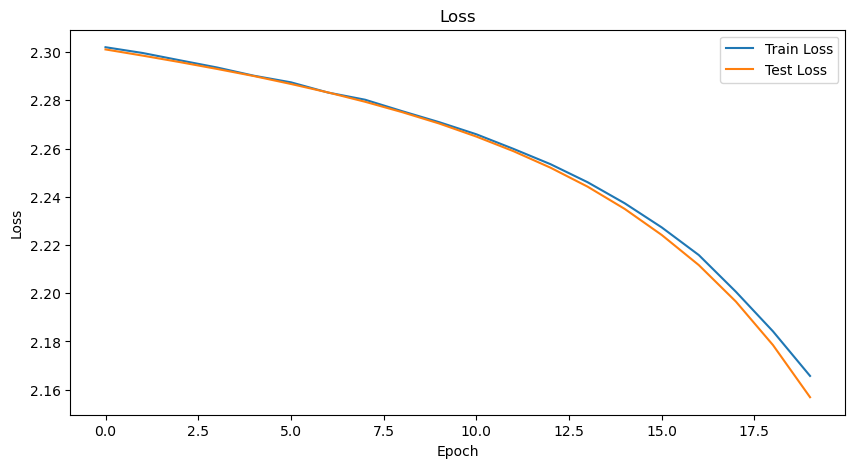

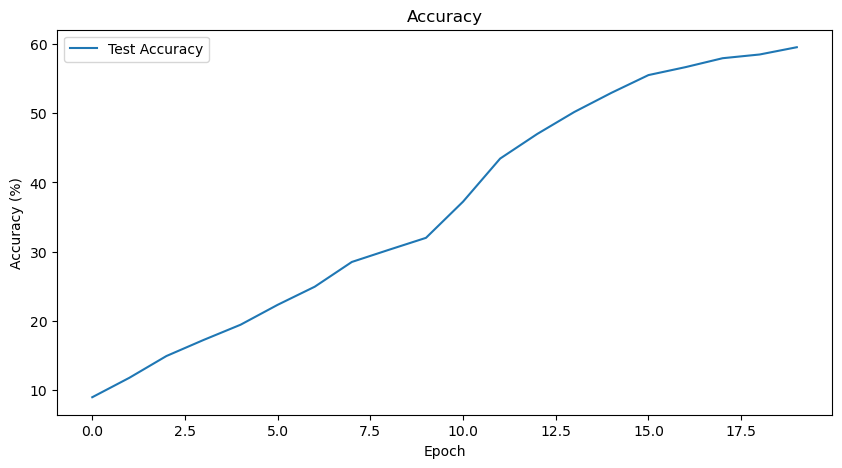

In [18]:
# 학습 및 평가 기록을 저장할 리스트
train_losses = []
test_losses = []
test_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')

# 손실 곡선 시각화
plt.figure(figsize=(10,5))
plt.title('Loss')
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 시각화
plt.figure(figsize=(10,5))
plt.title('Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


위의 코드를 실행하면, 학습 손실은 계속 감소하지만 테스트 손실은 일정 수준에서 감소하지 않거나 증가할 수 있으며, 이는 오버피팅이 발생했음을 나타냅니다.

#### 5. 오버피팅 해결 방법 적용

- 이제 오버피팅을 방지하기 위한 기법들을 적용하여 동일한 과정을 반복해보겠습니다.

**A. 데이터 증강 적용**

In [19]:
# 데이터 변환에 데이터 증강 기법 추가
transform_augmented = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

# 데이터셋 및 로더 재정의
train_dataset_augmented = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_augmented)
train_subset_augmented = torch.utils.data.Subset(train_dataset_augmented, subset_indices)
train_loader_augmented = torch.utils.data.DataLoader(train_subset_augmented, batch_size=64, shuffle=True)


**B. 드롭아웃 및 배치 정규화 적용한 모델 정의**

In [20]:
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout1(self.relu1(self.bn1(self.layer1(x))))
        x = self.dropout2(self.relu2(self.bn2(self.layer2(x))))
        x = self.relu3(self.bn3(self.layer3(x)))
        x = self.layer4(x)
        return x

# 모델, 손실 함수, 옵티마이저 재정의 (L2 정규화 적용)
model_improved = ImprovedNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_improved.parameters(), lr=0.01, weight_decay=0.001)


**C. 학습 및 평가 (조기 종료 포함)**

Epoch [1/20] - Train Loss: 2.2361, Test Loss: 2.1333, Accuracy: 42.42%
Epoch [2/20] - Train Loss: 1.9958, Test Loss: 1.7761, Accuracy: 68.49%
Epoch [3/20] - Train Loss: 1.7777, Test Loss: 1.5265, Accuracy: 72.08%
Epoch [4/20] - Train Loss: 1.5732, Test Loss: 1.3438, Accuracy: 75.69%
Epoch [5/20] - Train Loss: 1.3986, Test Loss: 1.1706, Accuracy: 77.73%
Epoch [6/20] - Train Loss: 1.2515, Test Loss: 1.0357, Accuracy: 80.05%
Epoch [7/20] - Train Loss: 1.1216, Test Loss: 0.9310, Accuracy: 81.63%
Epoch [8/20] - Train Loss: 1.0291, Test Loss: 0.8267, Accuracy: 83.18%
Epoch [9/20] - Train Loss: 0.9520, Test Loss: 0.7608, Accuracy: 84.39%
Epoch [10/20] - Train Loss: 0.8753, Test Loss: 0.6893, Accuracy: 85.44%
Epoch [11/20] - Train Loss: 0.8199, Test Loss: 0.6453, Accuracy: 85.41%
Epoch [12/20] - Train Loss: 0.7653, Test Loss: 0.5958, Accuracy: 86.27%
Epoch [13/20] - Train Loss: 0.7185, Test Loss: 0.5658, Accuracy: 86.69%
Epoch [14/20] - Train Loss: 0.6774, Test Loss: 0.5317, Accuracy: 87.40%
E

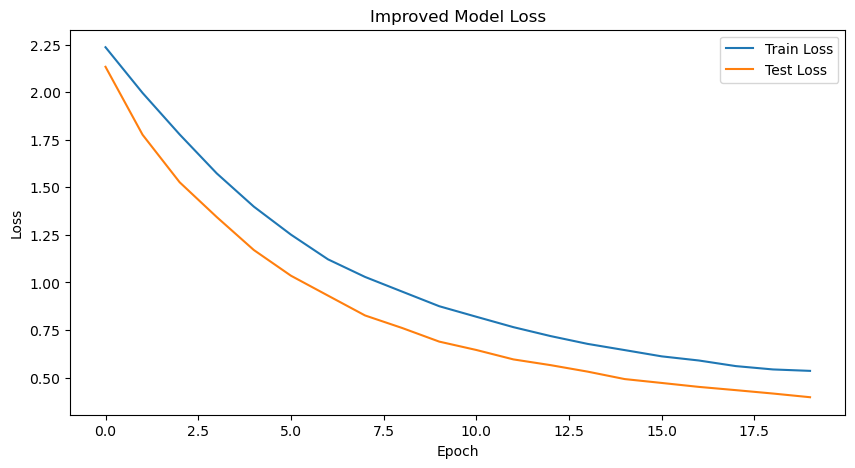

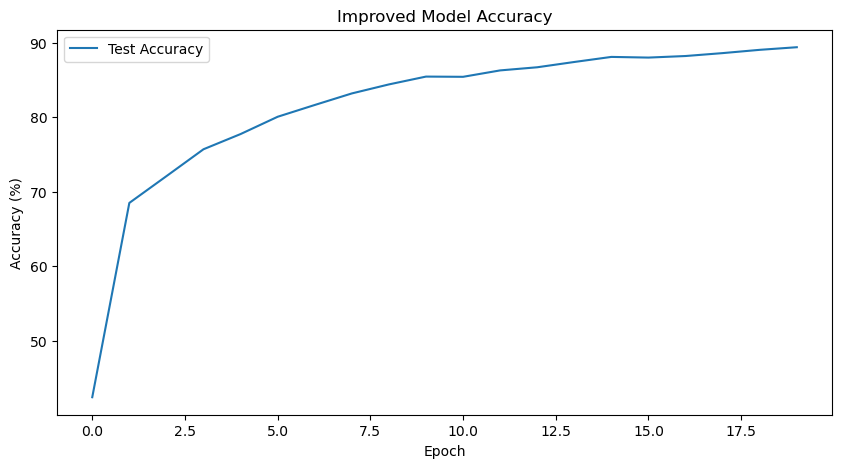

In [21]:
train_losses_improved = []
test_losses_improved = []
test_accuracies_improved = []

best_loss = float('inf')
patience = 3
trigger_times = 0

num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model_improved, train_loader_augmented, optimizer, criterion)
    test_loss, test_accuracy = evaluate(model_improved, test_loader, criterion)
    
    train_losses_improved.append(train_loss)
    test_losses_improved.append(test_loss)
    test_accuracies_improved.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%')
    
    # 조기 종료 조건 확인
    if test_loss < best_loss:
        best_loss = test_loss
        trigger_times = 0
    else:
        trigger_times += 1
        print(f'Early stopping counter: {trigger_times}/{patience}')
        if trigger_times >= patience:
            print('Early stopping!')
            break

# 손실 곡선 시각화
plt.figure(figsize=(10,5))
plt.title('Improved Model Loss')
plt.plot(train_losses_improved, label='Train Loss')
plt.plot(test_losses_improved, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 곡선 시각화
plt.figure(figsize=(10,5))
plt.title('Improved Model Accuracy')
plt.plot(test_accuracies_improved, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


위의 코드를 실행하면, 오버피팅이 완화되고 테스트 데이터에 대한 성능이 향상되는 것을 확인할 수 있습니다.

#### 6. 결과 비교 및 분석
- **손실 곡선 비교** : 오버피팅이 발생한 모델과 개선된 모델의 손실 곡선을 비교하여, 개선된 모델의 테스트 손실이 안정적으로 감소
- **정확도 곡선 비교** : 테스트 데이터에 대한 정확도가 개선된 모델에서 더 높게 나타남
- **시각화** : 그래프를 활용하여 학습자들이 변화된 결과를 직관적으로 이해

## 8.3 드롭아웃

### `개념`

- 드롭아웃(Dropout)은 신경망에서 과적합을 방지하기 위한 중요한 정규화 기법입니다.
- 학습 과정에서 무작위로 일부 뉴런을 제거(비활성화)하는 기법
- 각 학습 단계마다 지정된 확률로 뉴런을 건너뛰게 함
- 전형적으로 0.2~0.5 사이의 드롭아웃 비율 사용
- 테스트 단계에서는 드롭아웃 비활성화

## ` 적용 실습` 

### PyTorch 드롭아웃 구현 예시

In [22]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.dropout1 = nn.Dropout(0.3)  # 30% 드롭아웃
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # 50% 드롭아웃
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

- model.train()  # 학습 모드 - 드롭아웃 활성화
- model.eval()   # 평가 모드 - 드롭아웃 비활성화

### 드롭아웃 장점
- 과적합 방지
- 앙상블 효과 유사
- 모델의 일반화 성능 향상
- 특정 뉴런에 대한 의존성 감소

> ## 정규화와 드롭아웃을 적용한 PyTorch 모델

- **모델 정의**
- SimpleNN 클래스는 두 개의 은닉층을 가지는 신경망 모델입니다.
- nn.Linear(10, 64)와 nn.Linear(64, 32)로 각 층을 정의하고, 출력층은 이진 분류를 위해 nn.Linear(32, 1)로 설정합니다.
- nn.Dropout(0.5)를 사용하여 드롭아웃을 적용합니다. 이는 훈련 중에 뉴런의 50%를 랜덤하게 끄는 방식입니다.
- 옵티마이저인 Adam에 weight_decay=0.01을 설정하여 L2 정규화를 적용합니다. 이는 가중치가 지나치게 커지는 것을 방지합니다.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# 예시 데이터 생성
# X: 1000개의 샘플, 각 샘플은 10개의 특성(feature)
# y: 이진 분류 (0 또는 1)
X = np.random.rand(1000, 10).astype(np.float32)
y = np.random.randint(0, 2, size=(1000,)).astype(np.float32)

# DataLoader 설정
dataset = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 은닉층 1 (입력 10, 출력 64)
        self.fc1 = nn.Linear(10, 64)
        # 드롭아웃 (확률 0.5)
        self.dropout = nn.Dropout(0.5)
        # 은닉층 2 (입력 64, 출력 32)
        self.fc2 = nn.Linear(64, 32)
        # 출력층 (이진 분류)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 첫 번째 은닉층
        x = self.dropout(x)  # 드롭아웃 적용
        x = torch.relu(self.fc2(x))  # 두 번째 은닉층
        x = torch.sigmoid(self.fc3(x))  # 출력층
        return x

# 모델 인스턴스
model = SimpleNN()

# 손실 함수와 옵티마이저 설정
# L2 정규화를 위해 weight_decay를 설정 (0.01)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

# 훈련 함수
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # 훈련 모드로 설정
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # 기울기 초기화
            
            # 순전파
            outputs = model(inputs)
            
            # 손실 계산
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()  # 역전파
            optimizer.step()  # 가중치 업데이트
            
            running_loss += loss.item()
        
        # 에포크마다 손실 출력
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# 훈련 시작
train(model, train_loader, criterion, optimizer, epochs=10)

Epoch 1/10, Loss: 0.6930201314389706
Epoch 2/10, Loss: 0.6927815601229668
Epoch 3/10, Loss: 0.691246759146452
Epoch 4/10, Loss: 0.6924836449325085
Epoch 5/10, Loss: 0.6923303604125977
Epoch 6/10, Loss: 0.692257784307003
Epoch 7/10, Loss: 0.6921798288822174
Epoch 8/10, Loss: 0.6923176869750023
Epoch 9/10, Loss: 0.6917825266718864
Epoch 10/10, Loss: 0.6916038766503334


----

### **데이터셋은 `Sine Function`을 기반으로 하며, 훈련 데이터와 테스트 데이터에서의 성능을 비교해 보겠습니다.**

**Sine Function 데이터셋**은 수학적인 **사인 함수**(Sine Function)를 기반으로 한 데이터셋입니다. 

이 데이터셋은 주로 **회귀 문제**(regression problem)에서 사용되며, 함수의 특성을 학습하거나 시각화하는 데 유용합니다. 

이 데이터셋은 주로 훈련 데이터와 테스트 데이터로 나누어 모델이 어떻게 **일반화(generalization)를 수행하는지, 또는 오버피팅(overfitting)** 문제를 어떻게 발생시키는지 확인하는 데 사용됩니다.

#### **Sine Function 데이터셋**

Sine 함수는 주기적인 특성을 가진 함수로, 주어진 입력값에 대해 사인값을 출력합니다.

#### **이 데이터셋을 사용하는 목적**

1.  **회귀 모델 학습**: 이 데이터셋을 사용하여 회귀 모델을 훈련시킬 수 있습니다. 예를 들어, 선형 회귀나 다층 퍼셉트론(MLP)을 사용하여 sin⁡(x)값을 예측할 수 있습니다.
2.  **오버피팅 관찰**: 과도하게 복잡한 모델을 사용하여 훈련시키면 오버피팅 현상이 발생할 수 있습니다. 훈련 데이터에는 잘 맞지만 테스트 데이터에서 성능이 떨어지는 현상을 확인할 수 있습니다.
3.  **모델 일반화 성능 평가**: 모델이 노이즈를 얼마나 잘 처리하고, 일반화할 수 있는지 평가할 수 있습니다.

#### **Sine Function 데이터셋을 통한 학습 목표**

-   모델이 **비선형 관계**를 잘 학습할 수 있는지 확인.
-   **오버피팅과 일반화**를 실험하여 모델 복잡도와 성능 사이의 균형을 맞추는 방법을 학습.
-   **노이즈 처리** 및 **예측 정확도** 개선 방법을 연구.

이 데이터셋은 머신러닝 모델을 훈련하고 평가하는 데 매우 유용하며, 특히 **회귀 문제**와 관련된 여러 가지 실험을 진행할 때 많이 사용됩니다.

### 1. 라이브러리 및 데이터셋 준비

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 시드 설정
torch.manual_seed(0)

# 데이터셋 생성: Sine 함수
X = np.linspace(-10, 10, 200)
y = np.sin(X) + 0.1 * np.random.randn(200)  # 약간의 노이즈 추가

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이토치 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### 2. 모델 정의

간단한 신경망을 정의하여 오버피팅을 발생시키는 모델을 구성합니다. 과도하게 많은 파라미터를 가진 모델을 사용하여 오버피팅을 유도합니다.

In [25]:
class OverfittingModel(nn.Module):
    def __init__(self):
        super(OverfittingModel, self).__init__()
        # 아주 많은 은닉층을 추가하여 복잡한 모델을 만듭니다.
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 200)
        self.fc3 = nn.Linear(200, 500)
        self.fc4 = nn.Linear(500, 200)
        self.fc5 = nn.Linear(200, 50)
        self.fc6 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# 모델 초기화
model = OverfittingModel()

### 3. 훈련

모델을 훈련하고, 훈련 데이터에서 과적합을 유도합니다.

In [26]:
# 손실 함수와 옵티마이저 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 훈련 과정
num_epochs = 500
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # 순전파
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # 역전파
    loss.backward()
    optimizer.step()
    
    # 손실 기록
    train_losses.append(loss.item())
    
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 훈련 후 모델 평가
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

Epoch [50/500], Loss: 0.2045
Epoch [100/500], Loss: 0.1363
Epoch [150/500], Loss: 0.0499
Epoch [200/500], Loss: 0.0206
Epoch [250/500], Loss: 0.0184
Epoch [300/500], Loss: 0.0064
Epoch [350/500], Loss: 0.0066
Epoch [400/500], Loss: 0.0072
Epoch [450/500], Loss: 0.0086
Epoch [500/500], Loss: 0.0054


### 4. 결과 시각화

훈련 데이터와 테스트 데이터에 대한 예측 결과를 시각화하여 오버피팅이 발생한 모습을 확인합니다.

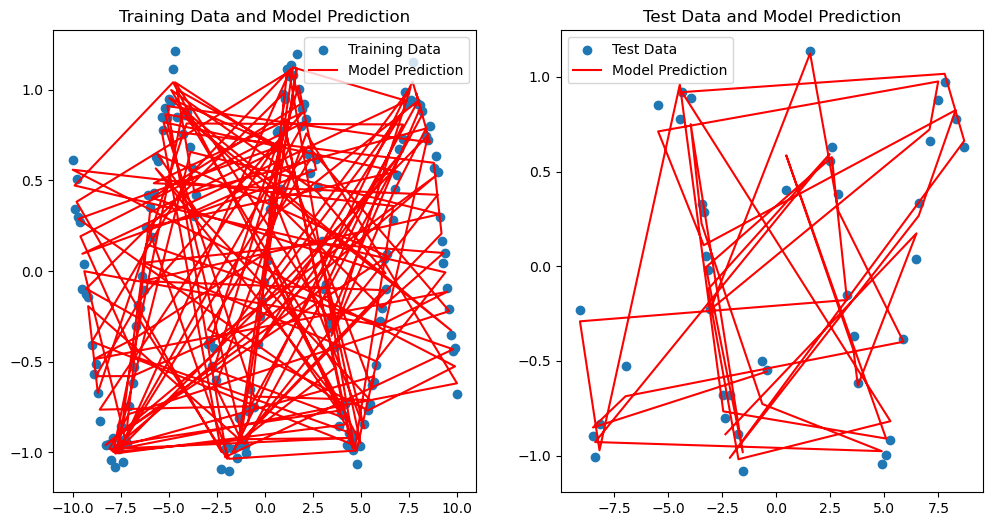

In [27]:
# 훈련 데이터와 테스트 데이터에 대한 예측 시각화
plt.figure(figsize=(12, 6))

# 훈련 데이터와 예측
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_train, train_preds.numpy(), label="Model Prediction", color='r')
plt.title('Training Data and Model Prediction')
plt.legend()

# 테스트 데이터와 예측
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, test_preds.numpy(), label="Model Prediction", color='r')
plt.title('Test Data and Model Prediction')
plt.legend()

plt.show()

### 5. 결과 분석

- 훈련 데이터에서는 모델이 매우 잘 적합되어, Sine 함수의 패턴을 거의 완벽하게 맞춥니다.
- 테스트 데이터에서는 모델이 실제 데이터의 패턴을 잘 맞추지 못하고, 예측 성능이 떨어지는 것을 확인할 수 있습니다. 이것이 오버피팅의 전형적인 현상입니다.

### 오버피팅 방지 방법

- **모델 단순화** : 너무 복잡한 모델(예: 과도한 층과 노드)을 피합니다.
- **정규화** : L1/L2 정규화와 같은 방법으로 모델의 복잡성을 제한합니다.
- **드롭아웃** : 신경망 훈련 중 일부 뉴런을 임의로 무시하여 과적합을 방지합니다.
- **더 많은 데이터** : 훈련 데이터를 늘리면 모델이 데이터의 패턴을 더 잘 일반화할 수 있습니다.
- **조기 종료**(Early Stopping) : 모델이 훈련 데이터에 너무 적합해지지 않도록 훈련을 중간에 멈추는 방법입니다.

이 예시에서는 과도하게 복잡한 신경망을 사용하여 오버피팅을 일으켰습니다. 

이를 통해 오버피팅이 어떻게 발생하는지, 그리고 테스트 데이터에서의 성능 저하를 시각적으로 확인할 수 있습니다.

-----

 ### **`다항 회귀`**(Polynomial Regression)를 사용하여 모델이 훈련 데이터에 과적합(overfitting)되는 상황

### 1. 데이터셋 준비

이번 예제에서는 **다항식 데이터**를 사용하여 훈련하고, 모델이 오버피팅되는 모습을 확인할 수 있습니다.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 시드 설정
torch.manual_seed(0)

# 데이터셋 생성: 다항식 함수 y = x^3 + 노이즈
X = np.linspace(-5, 5, 1000)
y = X**3 + 0.5 * np.random.randn(1000)  # 약간의 노이즈 추가

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이토치 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


### 2. 모델 정의

두 가지 모델을 정의합니다. 하나는 **단순 선형 회귀 모델**로, 다른 하나는 **다항식 회귀 모델**로 오버피팅을 발생시킬 수 있습니다.

In [29]:
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [30]:
class PolynomialModel(nn.Module):
    def __init__(self, degree=3):
        super(PolynomialModel, self).__init__()
        self.poly = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        
    def forward(self, x):
        return self.poly(x)

### 3. 모델 훈련

이제 단순 선형 회귀와 다항식 회귀 모델을 훈련하여 오버피팅을 확인해 보겠습니다.

In [31]:
# 훈련 함수
def train_model(model, X_train_tensor, y_train_tensor, num_epochs=1000, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    # 훈련 과정
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        loss.backward()
        optimizer.step()
        
    return model

# 1. 단순 선형 회귀 모델 훈련
linear_model = SimpleLinearModel()
linear_model = train_model(linear_model, X_train_tensor, y_train_tensor)

# 2. 다항식 회귀 모델 훈련
poly_model = PolynomialModel(degree=3)
poly_model = train_model(poly_model, X_train_tensor, y_train_tensor)


### 4. 훈련 및 테스트 결과 시각화

훈련된 모델을 시각화하여 오버피팅을 확인해 보겠습니다. 

훈련 데이터와 테스트 데이터에 대한 예측을 비교합니다.

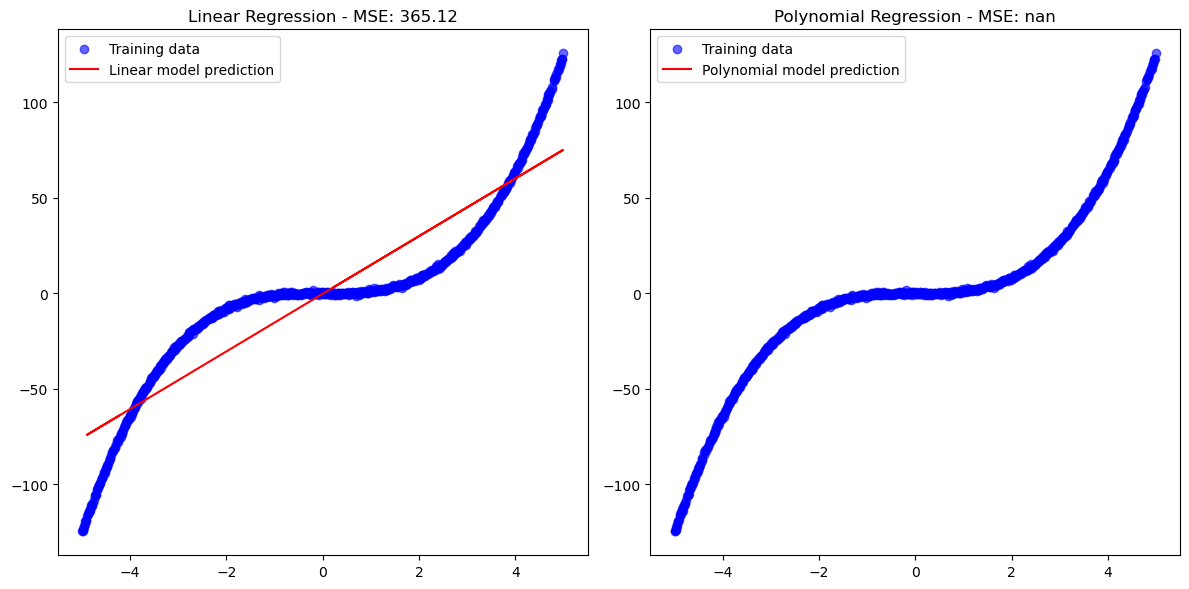

In [32]:
# 모델 평가 함수
def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)
        mse = nn.MSELoss()(predictions, y_tensor)
    return predictions, mse.item()

# 1. 선형 회귀 모델 평가
linear_predictions, linear_mse = evaluate_model(linear_model, X_test_tensor, y_test_tensor)

# 2. 다항식 회귀 모델 평가
poly_predictions, poly_mse = evaluate_model(poly_model, X_test_tensor, y_test_tensor)

# 시각화
plt.figure(figsize=(12, 6))

# 훈련 데이터 및 예측 결과 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label="Training data", color="blue", alpha=0.6)
plt.plot(X_test, linear_predictions, label="Linear model prediction", color="red")
plt.title(f"Linear Regression - MSE: {linear_mse:.2f}")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, label="Training data", color="blue", alpha=0.6)
plt.plot(X_test, poly_predictions, label="Polynomial model prediction", color="red")
plt.title(f"Polynomial Regression - MSE: {poly_mse:.2f}")
plt.legend()

plt.tight_layout()
plt.show()

### 5. 결과 분석

선형 회귀 모델은 단순한 데이터에 적합하고, 다항식 회귀 모델은 훈련 데이터에 너무 과적합되는 경향을 보입니다.

선형 모델은 테스트 데이터에서 일반화 성능이 좋지만, 다항식 모델은 훈련 데이터에 너무 맞추어져 오버피팅 현상이 발생하고, 테스트 데이터에 대한 성능이 크게 떨어집니다.

※ 이 예시는 모델 복잡도가 과도하게 높을 때 오버피팅이 발생하는 예를 보여줍니다.

---

### `성별 구별 모델 만들기`

성별 구별을 위한 데이터 생성 및 모델 학습
- 특성: 나이, 키, 체중 등을 포함.
- 타겟: 성별 (0: 여자, 1: 남자)

데이터 생성:
- X는 나이, 키, 체중을 특성으로 하는 랜덤 데이터를 생성합니다.
- y는 나이가 30세 이상인 경우를 남자(1), 그렇지 않으면 여자(0)로 구분합니다. (여기서는 간단한 규칙을 사용하지만 실제 데이터에서는 성별을 나타내는 정확한 정보가 필요합니다.)
- nn.Dropout(0.5) 드롭아웃을 적용하여 과적합을 방지합니다.
  

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score

# 성별 구별을 위한 데이터 생성
np.random.seed(42)

# 1000명의 데이터를 생성: 나이, 키, 체중 특성
# 나이: 18~60, 키: 150~190 cm, 체중: 40~100 kg
X = np.random.rand(1000, 3).astype(np.float32)
X[:, 0] = X[:, 0] * 43 + 18  # 나이: 18~60
X[:, 1] = X[:, 1] * 40 + 150  # 키: 150~190
X[:, 2] = X[:, 2] * 60 + 40  # 체중: 40~100

# 성별 (0: 여자, 1: 남자) 라벨 생성
y = (X[:, 0] > 30).astype(np.float32)  # 30세 이상이면 남자, 아니면 여자

# 데이터셋 나누기 (훈련과 테스트)
train_size = int(0.8 * len(X))  # 80% 훈련 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# DataLoader 설정
train_dataset = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_dataset = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 모델 정의
class GenderNN(nn.Module):
    def __init__(self):
        super(GenderNN, self).__init__()
        self.fc1 = nn.Linear(3, 64)  # 3개의 입력 특성 (나이, 키, 체중)
        self.dropout = nn.Dropout(0.5)  # 드롭아웃 적용
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 이진 분류 (여자: 0, 남자: 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 첫 번째 은닉층
        x = self.dropout(x)  # 드롭아웃 적용
        x = torch.relu(self.fc2(x))  # 두 번째 은닉층
        x = torch.sigmoid(self.fc3(x))  # 출력층
        return x

# 모델 인스턴스
model = GenderNN()

# 손실 함수와 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)

# 훈련 함수
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()  # 훈련 모드로 설정
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # 기울기 초기화
            
            # 순전파
            outputs = model(inputs)
            
            # 손실 계산
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()  # 역전파
            optimizer.step()  # 가중치 업데이트
            
            running_loss += loss.item()
        
        # 에포크마다 손실 출력
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

# 훈련 시작
train(model, train_loader, criterion, optimizer, epochs=10)

# 테스트 함수
def test(model, test_loader):
    model.eval()  # 평가 모드로 설정
    all_preds = []
    all_labels = []
    with torch.no_grad():  # 기울기 계산을 하지 않음
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = (outputs.squeeze() > 0.5).float() # 0.5를 기준으로 이진 예측
            all_preds.append(preds)
            all_labels.append(labels)
    
    # 결과를 텐서에서 numpy로 변환
    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()

    # 정확도 계산
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Accuracy on test data: {accuracy * 100:.2f}%')

# 테스트 시작
test(model, test_loader)

Epoch 1/10, Loss: 6.291588746584379
Epoch 2/10, Loss: 8.872830170851488
Epoch 3/10, Loss: 2.074696045655471
Epoch 4/10, Loss: 1.645288082269522
Epoch 5/10, Loss: 1.2151366472244263
Epoch 6/10, Loss: 0.9739742187353281
Epoch 7/10, Loss: 0.8501848028256342
Epoch 8/10, Loss: 0.7401689474399273
Epoch 9/10, Loss: 0.7450977472158579
Epoch 10/10, Loss: 0.6760227336333349
Accuracy on test data: 84.50%


- Accuracy는 모델이 테스트 데이터에서 얼마나 잘 성별을 구별했는지를 나타냅니다.